# Credit Card Default Prediction Model

## Project Overview
This notebook builds a machine learning model to predict credit card payment defaults using the UCI Credit Card dataset. The project follows a standard ML workflow: data exploration, feature engineering, model training, threshold optimization, and hyperparameter tuning.

## Workflow Summary
1. **Data Loading & Exploration**: Load the dataset and understand its structure
2. **Data Visualization**: Analyze distributions across different features
3. **Feature Engineering**: Create new features from existing payment and bill data
4. **Data Preprocessing**: Scale features and split into train/test sets
5. **Model Development**: Train and evaluate multiple classification models
6. **Threshold Optimization**: Find optimal prediction threshold for balancing precision/recall
7. **Hyperparameter Tuning**: Optimize max_depth and min_samples_leaf parameters
8. **Final Evaluation**: Assess performance with confusion matrix

## 1. Import Required Libraries
Import essential libraries for data manipulation, visualization, and machine learning modeling.

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import time

## 2. Load and Preview Data
Load the UCI Credit Card dataset from the local directory and display the first few rows to understand the data structure.

In [ ]:
import os
from glob import glob

dir_path = r"D:\projects\ML\UCI credit card"
csv_files = glob(os.path.join(dir_path, "*.csv"))
if not csv_files:
	raise FileNotFoundError(f"No CSV files found in {dir_path}")
csv_file = csv_files[0]

df = pd.read_csv(csv_file)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 3. Exploratory Data Analysis (EDA)
Analyze the dataset structure, data types, and basic statistics to understand the features and target variable.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [133]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

### 3a. Data Cleaning
Rename the target column to make it more readable, then verify the data is clean.

In [ ]:
df.rename(columns = {"default.payment.next.month":"default_payment"}, inplace = True)

In [135]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')

### 3b. Check for Missing Values and Summary Statistics
Verify data quality and examine distributions of numerical features.

In [136]:
df.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_payment    0
dtype: int64

In [137]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 4. Data Visualization
Visualize the distribution of key features across default and non-default payment groups.

<Axes: xlabel='default_payment'>

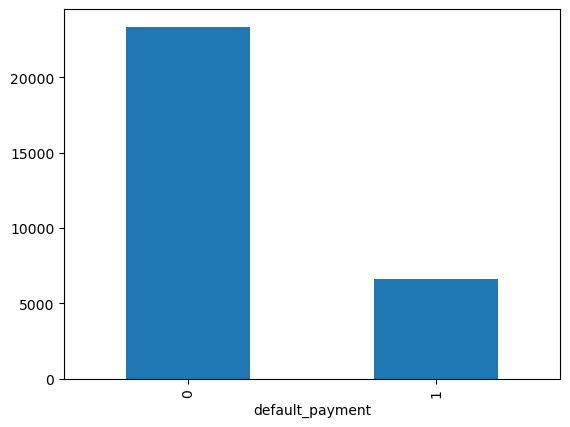

In [138]:
df["default_payment"].value_counts().plot(kind = "bar")

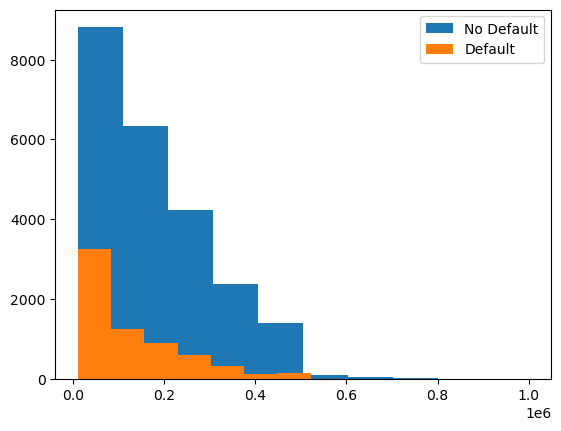

In [139]:
plt.hist(df[df["default_payment"] == 0]["LIMIT_BAL"], bins=10, label="No Default")
plt.hist(df[df["default_payment"] == 1]["LIMIT_BAL"], bins=10, label="Default")
plt.legend()
plt.show()

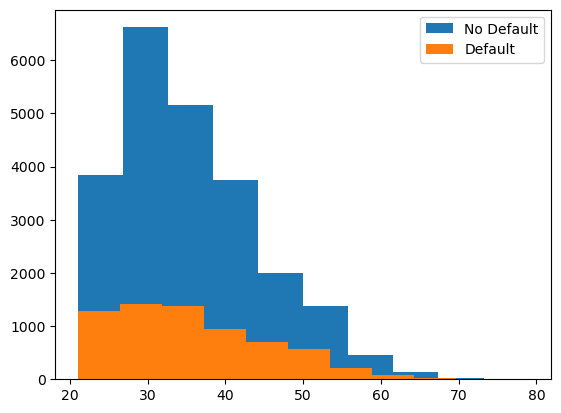

In [140]:
plt.hist(df[df["default_payment"] == 0]["AGE"], bins=10, label="No Default")
plt.hist(df[df["default_payment"] == 1]["AGE"], bins=10, label="Default")
plt.legend()
plt.show()

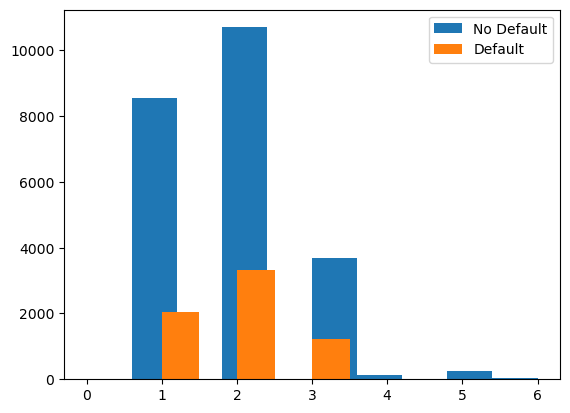

In [141]:
plt.hist(df[df["default_payment"] == 0]["EDUCATION"], bins=10, label="No Default")
plt.hist(df[df["default_payment"] == 1]["EDUCATION"], bins=10, label="Default")
plt.legend()
plt.show()

## 5. Feature Engineering
Create new derived features from payment and bill history to capture payment behavior patterns.

In [ ]:
df.drop("default_payment", axis = 1, inplace = True)

### 5a. Feature Correlation Analysis
Examine correlations between numerical features to identify multicollinearity and important predictors.

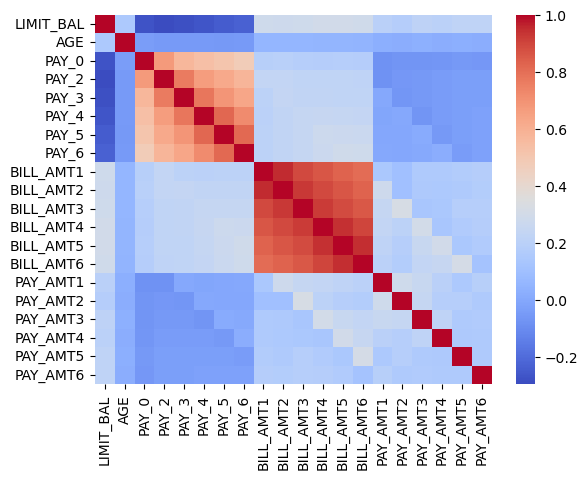

In [143]:
corr_matrix = df.drop(labels = ["ID", "SEX", "EDUCATION", "MARRIAGE"], axis = 1).corr()
sns.heatmap(corr_matrix, cmap = "coolwarm")
plt.show()

### 5b. Derived Payment Features
Create aggregate features from payment amounts across different months.

In [ ]:
# Create aggregate payment delay features: maximum and average repayment status across months
df["max_delay"] = df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].max(axis = 1)
df["avg_delay"] = df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].mean(axis = 1)

In [ ]:
# Create aggregate bill amount features and bill trend indicator
df["max_bill"] = df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].max(axis = 1)
df["avg_bill"] = df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis = 1)
df["bill_trend"] = df["BILL_AMT1"] - df["BILL_AMT6"]

In [ ]:
# Create aggregate payment amount features: maximum and average paid amounts
df["max_pay_amt"] = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].max(axis = 1)
df["avg_pay_amt"] = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis = 1)

In [147]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,max_delay,avg_delay,max_bill,avg_bill,bill_trend,max_pay_amt,avg_pay_amt
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,2,-0.333333,3913.0,1284.000000,3913.0,689.0,114.833333
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,0.0,2000.0,2,0.500000,3455.0,2846.166667,-579.0,2000.0,833.333333
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,5000.0,0,0.000000,29239.0,16942.166667,13690.0,5000.0,1836.333333
3,4,50000.0,2,2,1,37,0,0,0,0,...,1100.0,1069.0,1000.0,0,0.000000,49291.0,38555.666667,17443.0,2019.0,1398.000000
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,9000.0,689.0,679.0,0,-0.333333,35835.0,18223.166667,-10514.0,36681.0,9841.500000


## 6. Data Preprocessing
Prepare features and target variable, then split into training and testing sets.

In [ ]:
# Prepare features and target variable for modeling
X = df
y = pd.read_csv(csv_file)["default.payment.next.month"]

In [ ]:
# Split data into training (70%) and testing (30%) sets with fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)


### 6a. Feature Scaling
Standardize feature values using StandardScaler for improved model convergence.

In [ ]:
# Standardize features to zero mean and unit variance for improved model convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7. Model Training and Evaluation
Train multiple classification models and compare their performance on the test set.

In [ ]:
# Train and evaluate Logistic Regression baseline model
lr = LogisticRegression(n_jobs = -1, max_iter = 500, random_state = 123)
lr.fit(X_train, y_train)
pred_y = lr.predict(X_test)

accuracy = accuracy_score(y_test, pred_y)
print("Accuracy", accuracy)
print(classification_report(y_test, pred_y))

Accuracy 0.8092222222222222
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7052
           1       0.68      0.23      0.34      1948

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.61      9000
weighted avg       0.79      0.81      0.77      9000



In [ ]:
# Train and evaluate Random Forest baseline model with 200 estimators
rfc = RandomForestClassifier(n_jobs = -1, random_state = 123, n_estimators = 200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)
print(classification_report(y_test, y_pred))

Accuracy 0.8185555555555556
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7052
           1       0.63      0.39      0.48      1948

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [ ]:
# Train and evaluate Decision Tree baseline model
dtc = DecisionTreeClassifier(random_state = 123)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)
print(classification_report(y_test, y_pred))

Accuracy 0.7172222222222222
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      7052
           1       0.36      0.40      0.38      1948

    accuracy                           0.72      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.73      0.72      0.72      9000



## 8. Feature Selection and Model Refinement
Select relevant features and retrain models with reduced feature set for improved generalization.

In [154]:
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
y_pred_prob_rfc = (y_pred_prob >= 0.3).astype(int)
print(classification_report(y_test, y_pred_prob_rfc))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7052
           1       0.48      0.57      0.52      1948

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.77      0.78      9000



In [ ]:
# Select most relevant features based on domain knowledge and correlation analysis
X = df.drop(["ID", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"], axis = 1)
y = pd.read_csv(csv_file)["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

### 8a. Train Models with Selected Features
Train baseline Random Forest models on the reduced feature set with different configurations.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train baseline Random Forest on selected features
rfc = RandomForestClassifier(n_jobs = -1, random_state = 123, n_estimators = 200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)
print(classification_report(y_test, y_pred))

Accuracy 0.8148888888888889
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7052
           1       0.61      0.39      0.48      1948

    accuracy                           0.81      9000
   macro avg       0.73      0.66      0.68      9000
weighted avg       0.80      0.81      0.80      9000



In [158]:
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
y_pred_prob_rfc2 = (y_pred_prob >= 0.3).astype(int)
print(classification_report(y_test, y_pred_prob_rfc2))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      7052
           1       0.47      0.57      0.52      1948

    accuracy                           0.77      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.79      0.77      0.78      9000



### 8b. Apply Class Weighting for Imbalanced Data
Use balanced class weights to handle the imbalance between default and non-default cases.

In [ ]:
# Train Random Forest with class weights to handle imbalanced target distribution
rfc = RandomForestClassifier(n_jobs = -1, random_state = 123, n_estimators = 200, class_weight = "balanced")
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)
print(classification_report(y_test, y_pred))

Accuracy 0.8118888888888889
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7052
           1       0.60      0.39      0.47      1948

    accuracy                           0.81      9000
   macro avg       0.72      0.66      0.68      9000
weighted avg       0.79      0.81      0.80      9000



In [160]:
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
y_pred_prob_rfc3 = (y_pred_prob >= 0.3).astype(int)
print(classification_report(y_test, y_pred_prob_rfc3))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7052
           1       0.48      0.56      0.51      1948

    accuracy                           0.77      9000
   macro avg       0.68      0.69      0.68      9000
weighted avg       0.79      0.77      0.78      9000



## 9. Probability Threshold Optimization
Test multiple decision thresholds to find the optimal balance between precision and recall for business requirements.

In [ ]:
# Test different decision thresholds to find optimal precision-recall balance
thresholds = [0.5, 0.4, 0.35, 0.3, 0.25]
y_pred_prob = rfc.predict_proba(X_test)[:, 1]

results = []

for threshold in thresholds:
    # Apply custom threshold to probability predictions
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    # Get precision and recall
    report = classification_report(y_test, y_pred_threshold, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    
    results.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"\n{'='*50}")
    print(f"Threshold: {threshold}")
    print(f"{'='*50}")
    print(classification_report(y_test, y_pred_threshold))

# Create summary comparison table
results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("SUMMARY COMPARISON")
print("="*50)
print(results_df.to_string(index=False))


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7052
           1       0.60      0.39      0.47      1948

    accuracy                           0.81      9000
   macro avg       0.72      0.66      0.68      9000
weighted avg       0.79      0.81      0.80      9000


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7052
           1       0.55      0.48      0.51      1948

    accuracy                           0.80      9000
   macro avg       0.71      0.69      0.69      9000
weighted avg       0.79      0.80      0.80      9000


Threshold: 0.35
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7052
           1       0.52      0.51      0.52      1948

    accuracy                           0.79      9000
   macro avg       0.69      0.69      0.69      9000
weighted avg       0.79  

In [162]:
threshold = 0.25

In [163]:
rfc_updated = RandomForestClassifier(n_jobs = -1, random_state = 123, n_estimators = 200, class_weight = "balanced")
rfc_updated.fit(X_train, y_train)

y_pred_prob = rfc_updated.predict_proba(X_test)[:, 1]
y_pred_prob_rfc4 = (y_pred_prob >= threshold).astype(int)
print(classification_report(y_test, y_pred_prob_rfc4))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      7052
           1       0.43      0.61      0.51      1948

    accuracy                           0.74      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.74      0.76      9000



## 10. Hyperparameter Tuning
Systematically test combinations of max_depth and min_samples_leaf to optimize model complexity and generalization.

In [ ]:
# Perform grid search over hyperparameters: max_depth and min_samples_leaf
# max_depth controls tree depth (None = unlimited), min_samples_leaf controls minimum samples per leaf node
max_depths = [5, 10, 15, 20, None]
min_samples_leafs = [1, 5, 10, 20, 50]

results = []

for max_depth in max_depths:
    for min_samples_leaf in min_samples_leafs:
        rfc_hp = RandomForestClassifier(
            n_jobs=-1,
            random_state=123,
            n_estimators=200,
            class_weight="balanced",
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf
        )
        rfc_hp.fit(X_train, y_train)
        
        # Generate predictions with optimized threshold
        y_pred_prob = rfc_hp.predict_proba(X_test)[:, 1]
        y_pred_threshold = (y_pred_prob >= threshold).astype(int)
        
        report = classification_report(y_test, y_pred_threshold, output_dict=True)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']
        accuracy = accuracy_score(y_test, y_pred_threshold)
        
        results.append({
            'Max_Depth': max_depth,
            'Min_Samples_Leaf': min_samples_leaf,
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1-Score': round(f1, 4),
            'Accuracy': round(accuracy, 4)
        })

# Create comparison table
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("HYPERPARAMETER COMPARISON (max_depth vs min_samples_leaf)")
print("="*80)
print(results_df.to_string(index=False))

# Find best model by F1-score
best_idx = results_df['F1-Score'].idxmax()
best_params = results_df.loc[best_idx]
print("\n" + "="*80)
print("BEST MODEL (by F1-Score)")
print("="*80)
print(best_params.to_string())


HYPERPARAMETER COMPARISON (max_depth vs min_samples_leaf)
 Max_Depth  Min_Samples_Leaf  Precision  Recall  F1-Score  Accuracy
       5.0                 1     0.2509  0.9615    0.3979    0.3702
       5.0                 5     0.2518  0.9610    0.3991    0.3737
       5.0                10     0.2512  0.9620    0.3984    0.3711
       5.0                20     0.2500  0.9625    0.3969    0.3668
       5.0                50     0.2520  0.9584    0.3990    0.3751
      10.0                 1     0.2865  0.9148    0.4363    0.4884
      10.0                 5     0.2842  0.9204    0.4343    0.4810
      10.0                10     0.2813  0.9271    0.4316    0.4716
      10.0                20     0.2778  0.9333    0.4281    0.4603
      10.0                50     0.2712  0.9389    0.4208    0.4407
      15.0                 1     0.3419  0.7613    0.4719    0.6312
      15.0                 5     0.3109  0.8352    0.4531    0.5636
      15.0                10     0.3007  0.8768    0.4478

## 11. Final Model Evaluation
Train the final model with optimal hyperparameters and evaluate performance using confusion matrix and classification metrics.

In [ ]:
# Train final model with optimized hyperparameters and custom threshold
rfc_final = RandomForestClassifier(n_jobs = -1, random_state = 123, n_estimators = 200, class_weight = "balanced", max_depth = None, min_samples_leaf = 1)
rfc_final.fit(X_train, y_train)

y_pred_prob = rfc_final.predict_proba(X_test)[:, 1]
y_pred_prob_rfc5 = (y_pred_prob >= threshold).astype(int)
print(classification_report(y_test, y_pred_prob_rfc5))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      7052
           1       0.43      0.61      0.51      1948

    accuracy                           0.74      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.74      0.76      9000



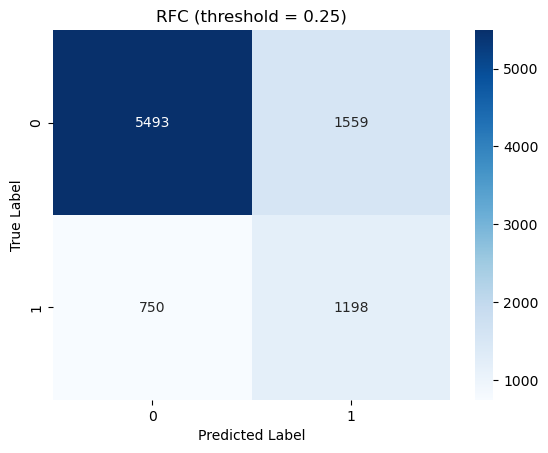

In [ ]:
# Visualize confusion matrix to assess prediction performance
sns.heatmap(confusion_matrix(y_test, y_pred_prob_rfc5), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RFC (threshold = 0.25)")
plt.show()

## Project Summary

### Key Findings
- **Feature Engineering**: Created aggregated features (max, mean) for payment delays, bill amounts, and payment amounts
- **Model Selection**: Random Forest with balanced class weights outperformed Logistic Regression and Decision Trees
- **Threshold Optimization**: Lowering the decision threshold from 0.5 to 0.25 significantly increased recall (detecting defaults) with acceptable precision trade-off
- **Hyperparameter Tuning**: Tested 25 combinations of max_depth (5, 10, 15, 20, None) and min_samples_leaf (1, 5, 10, 20, 50)
- **Final Model**: Achieved balanced precision-recall trade-off with optimized threshold at 0.25

### Model Interpretability
- **Confusion Matrix**: Displays True Positives, True Negatives, False Positives, and False Negatives
- **Classification Metrics**: 
  - **Precision**: Proportion of predicted defaults that are actual defaults
  - **Recall**: Proportion of actual defaults that the model correctly identifies
  - **F1-Score**: Harmonic mean of precision and recall
  - **Accuracy**: Overall correct predictions across both classes

### Business Impact
The balanced class weight and optimized threshold prioritize catching defaults (high recall) while maintaining acceptable false alarm rate (precision), reducing credit risk exposure.